In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('US_data.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
#total number of cases due to covid
data['cases'].aggregate(['sum'])

sum    116127298
Name: cases, dtype: int64

In [5]:
#total number of cases due to covid
data['deaths'].aggregate(['sum'])

sum    6448330
Name: deaths, dtype: int64

In [103]:
#drop fips column
#data = data.drop(['fips'], axis=1) 

#group the data by state and find the total sum of deaths and cases occured in that state 
df = data.groupby('state').sum()
df.sort_values(by='deaths', ascending=False)

,cases,deaths
state,,
New York,26922446,2018202
New Jersey,10733626,711956
Massachusetts,6109008,394872
Michigan,3978073,351968
Pennsylvania,4819054,313280
Illinois,6827187,310878
California,7009687,250772
Connecticut,2677234,230582
Louisiana,2815460,179863


In [7]:
#state with maximum number of cases
df[df['cases']== df['cases'].max()]

,cases,deaths
state,,
New York,26922446,2018202


In [8]:
#state with minimum number of cases
df[df['cases']== df['cases'].min()]

,cases,deaths
state,,
Northern Mariana Islands,1634,164


In [9]:
#similarly do with the country missplelled as 'county' here
d = data.groupby('county').sum()
d[d['cases'] == d['cases'].max()]

,cases,deaths
county,,
New York City,14959595,1462876


In [10]:
d[d['cases'] == d['cases'].min()]

,cases,deaths
county,,
Keya Paha,1,0
Loup,1,0
Throckmorton,1,0


In [11]:
#plot the graph to see the top 10 cities with maximum number of deaths
df.sort_values('deaths', ascending=False)[:10].plot.bar(stacked=True,figsize=(20,10), rot=0)

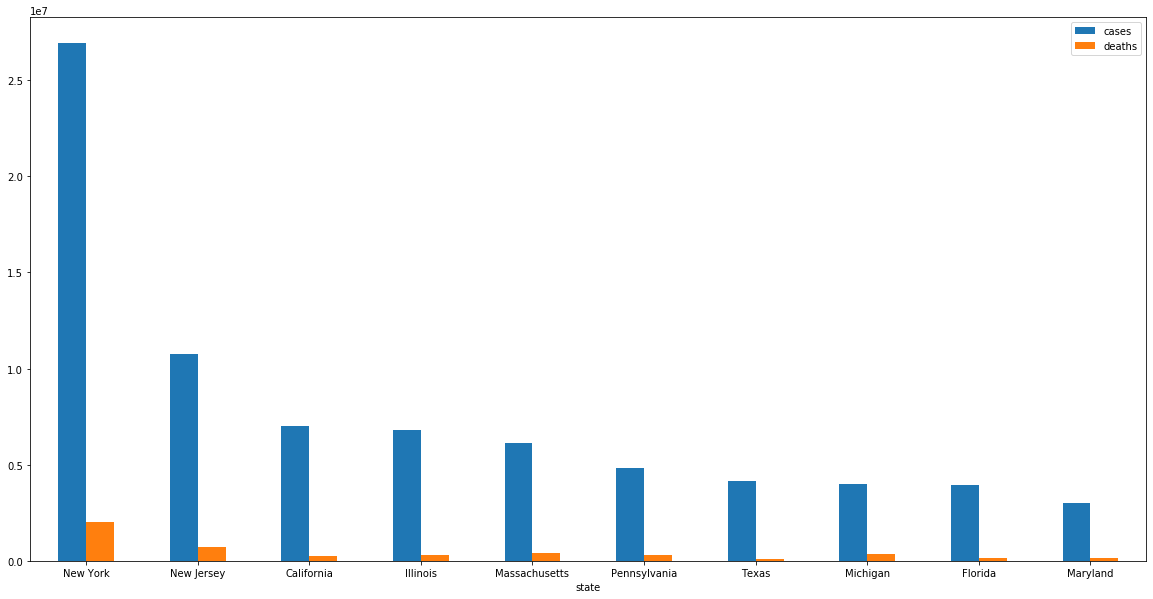

In [12]:
#plot the graph to see the top 10 cities with maximum number of deaths
df.sort_values('cases', ascending=False)[:10].plot.bar(figsize=(20,10), rot=0)

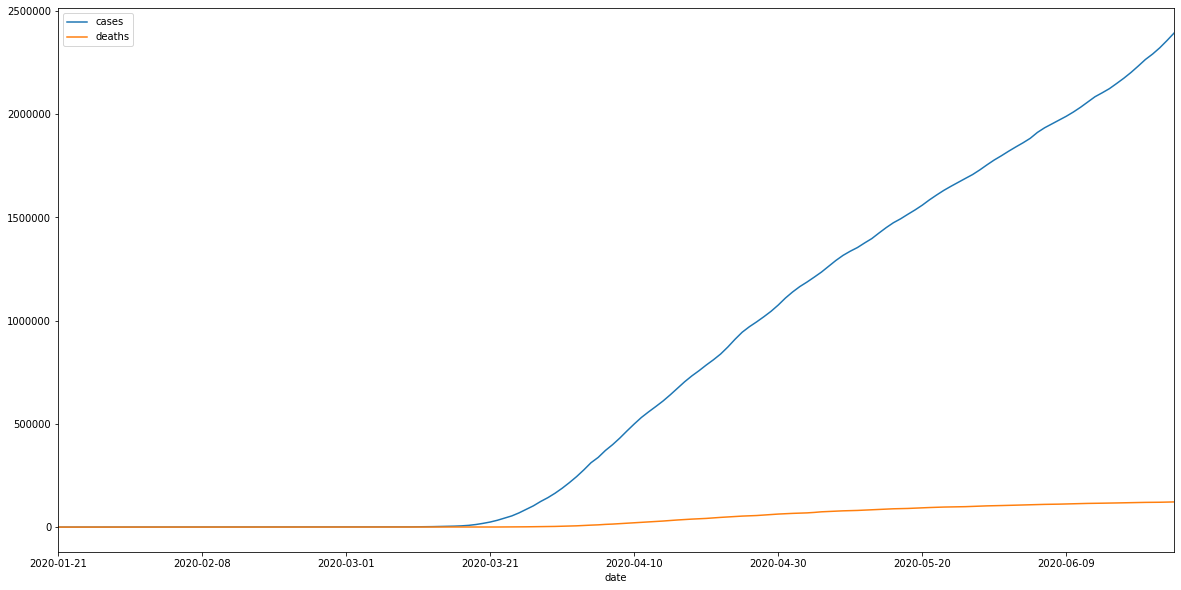

In [13]:
#plot the line graph to see the surge in covid cases after a particular date (21-03-2020)
data.groupby('date').sum().sort_values('deaths', ascending=True).plot.line(figsize=(20,10))

In [14]:
#on which date (24 june 2020) maximum death occurred

data.groupby('date').sum().sort_values('deaths', ascending=False)[:10]

,cases,deaths
date,,
2020-06-24,2394184,121927
2020-06-23,2357209,121160
2020-06-22,2322186,120328
2020-06-21,2291735,119967
2020-06-20,2265360,119710
2020-06-19,2233395,119166
2020-06-18,2202587,118457
2020-06-17,2174569,117732
2020-06-16,2148951,116979


In [15]:
#in which state on which date max death occurred 

data.groupby(['state', 'date']).sum().sort_values('deaths', ascending=False)

cases  deaths
state    date                      
New York 2020-06-24  394430   31001
         2020-06-23  393855   30970
         2020-06-22  393257   30934
         2020-06-21  392702   30884
         2020-06-20  392037   30839
...                     ...     ...
Iowa     2020-03-14      18       0
         2020-03-15      22       0
         2020-03-16      22       0
         2020-03-17      29       0
Alabama  2020-03-13       6       0

[6284 rows x 2 columns]

In [16]:
#uploading the dataset containing a list of democratic and republican states
states_data = pd.read_csv('states_data.csv', engine='python')
states_data

,State,partisanVotingIndexRebublican
0,Wyoming,25
1,Oklahoma,20
2,Utah,20
3,Idaho,19
4,West Virginia,19
5,North Dakota,17
6,Arkansas,15
7,Kentucky,15
8,Alabama,14
9,Nebraska,14


In [24]:
republic_state=[]
democrat_state=[]
neutral_state=[]
for index, rows in states_data.iterrows():
    x = rows["partisanVotingIndexRebublican"]
    if x >0:
        republic_state.append(rows['State'])
    elif x==0:
        neutral_state.append(rows['State'])
    else:
        democrat_state.append(rows['State'])

In [26]:
neutral_state

['New Hampshire', 'Pennsylvania', 'Wisconsin']

In [51]:
df = data.groupby('state').sum()
r_cases = 0
r_deaths = 0
d_cases =0
d_deaths=0
n_cases =0
n_deaths =0
count_r =0
count_d =0
rep_states =[]
rep_cases =[]
rep_deaths =[]
demo_states =[]
demo_cases =[]
demo_deaths =[]
neu_states =[]
neu_cases =[]
neu_deaths =[]
for index, rows in df.iterrows():
    if index in republic_state:
        #print("republic", index)
        rep_states.append(index)
        rep_cases.append(rows['cases'])
        rep_deaths.append(rows['deaths'])
        r_cases += rows['cases']
        r_deaths += rows['deaths']
        count_r += 1
    elif index in democrat_state:
        #print("democratic", index)
        demo_states.append(index)
        demo_cases.append(rows['cases'])
        demo_deaths.append(rows['deaths'])
        d_cases += rows['cases']
        d_deaths += rows['deaths']
        count_d += 1
    else:
        neu_states.append(index)
        neu_cases.append(rows['cases'])
        neu_deaths.append(rows['deaths'])
        #print("neutral", index)
        n_cases += rows['cases']
        n_deaths += rows['deaths']

In [52]:
republic_data = pd.DataFrame()
republic_data['State'] = rep_states
republic_data['Cases'] = rep_cases
republic_data['Deaths']= rep_deaths

republic_data

,State,Cases,Deaths
0,Alabama,1090608,36701
1,Alaska,38063,645
2,Arizona,1421787,52857
3,Arkansas,493339,8547
4,Florida,3931083,148805
5,Georgia,2886530,124493
6,Idaho,207482,5478
7,Indiana,2126235,126664
8,Iowa,1089441,28148
9,Kansas,570261,13814


In [53]:
democrat_data = pd.DataFrame()
democrat_data['State'] = demo_states
democrat_data['Cases'] = demo_cases
democrat_data['Deaths']= demo_deaths

democrat_data

,State,Cases,Deaths
0,California,7009687,250772
1,Colorado,1636997,85622
2,Connecticut,2677234,230582
3,Delaware,544218,20270
4,Hawaii,52986,1207
5,Illinois,6827187,310878
6,Maine,141708,5423
7,Maryland,2990481,142122
8,Massachusetts,6109008,394872
9,Michigan,3978073,351968


In [54]:
neutral_data = pd.DataFrame()
neutral_data['State'] = neu_states
neutral_data['Cases'] = neu_cases
neutral_data['Deaths']= neu_deaths

neutral_data

,State,Cases,Deaths
0,District of Columbia,519380,26136
1,Guam,84174,497
2,New Hampshire,273488,13490
3,Northern Mariana Islands,1634,164
4,Pennsylvania,4819054,313280
5,Puerto Rico,242782,8585
6,Virgin Islands,5595,366
7,Wisconsin,1051792,35900


In [95]:
republic_data.sort_values(by='Deaths',ascending=False).reset_index(drop=True)

,State,Cases,Deaths
0,Louisiana,2815460,179863
1,Florida,3931083,148805
2,Indiana,2126235,126664
3,Georgia,2886530,124493
4,Ohio,2127892,122712
5,Texas,4162928,100243
6,Arizona,1421787,52857
7,North Carolina,1764088,52106
8,Missouri,876269,44375
9,Mississippi,919409,40956


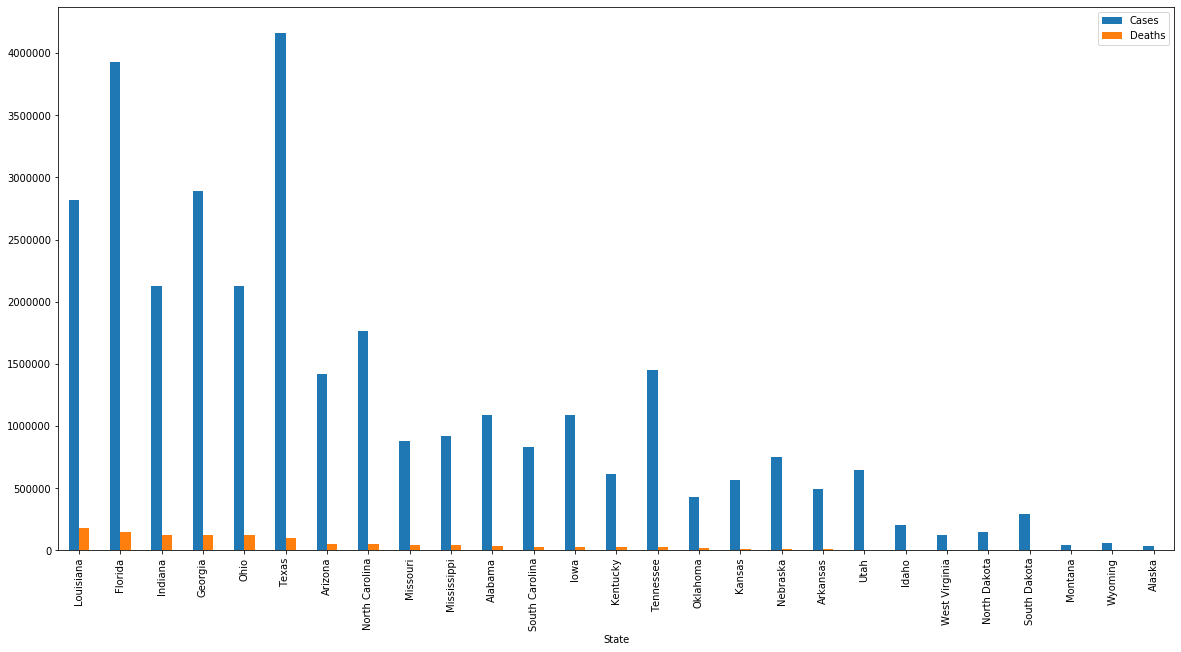

In [100]:
republic_data.sort_values(by='Deaths',ascending=False).plot.bar(x='State',figsize=(20,10))

In [97]:
democrat_data.sort_values(by='Deaths',ascending=False).reset_index(drop=True)

,State,Cases,Deaths
0,New York,26922446,2018202
1,New Jersey,10733626,711956
2,Massachusetts,6109008,394872
3,Michigan,3978073,351968
4,Illinois,6827187,310878
5,California,7009687,250772
6,Connecticut,2677234,230582
7,Maryland,2990481,142122
8,Colorado,1636997,85622
9,Washington,1611493,79151


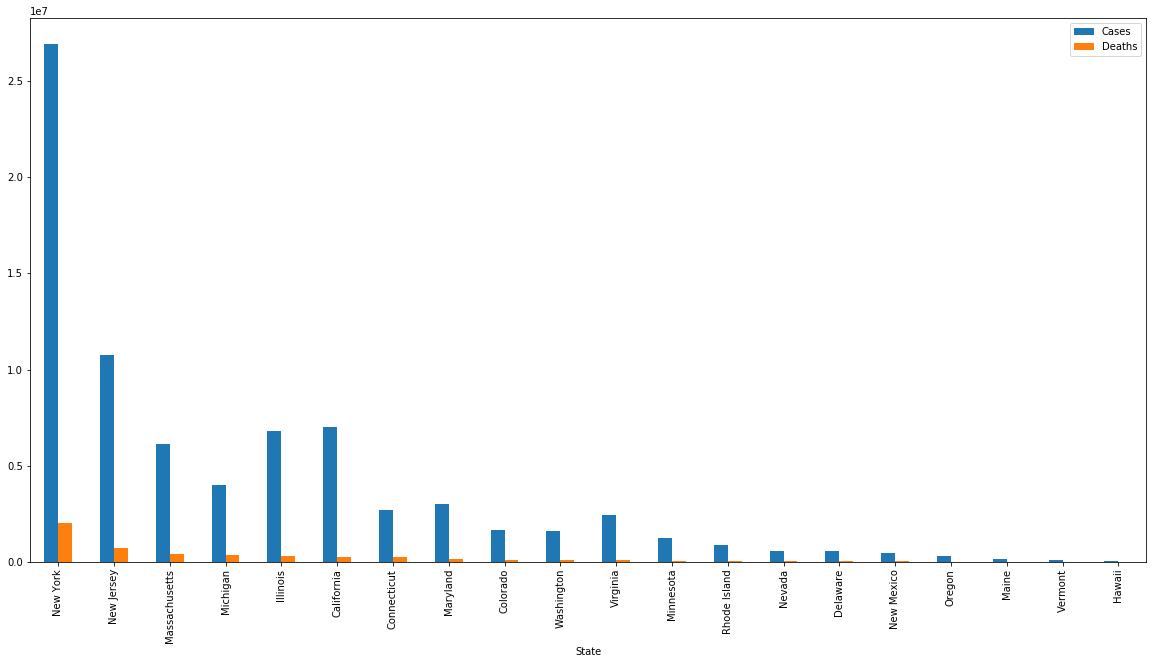

In [99]:
democrat_data.sort_values(by='Deaths',ascending=False).plot.bar(x='State',figsize=(20,10))

In [98]:
neutral_data.sort_values(by='Deaths',ascending=False).reset_index(drop=True)

,State,Cases,Deaths
0,Pennsylvania,4819054,313280
1,Wisconsin,1051792,35900
2,District of Columbia,519380,26136
3,New Hampshire,273488,13490
4,Puerto Rico,242782,8585
5,Guam,84174,497
6,Virgin Islands,5595,366
7,Northern Mariana Islands,1634,164


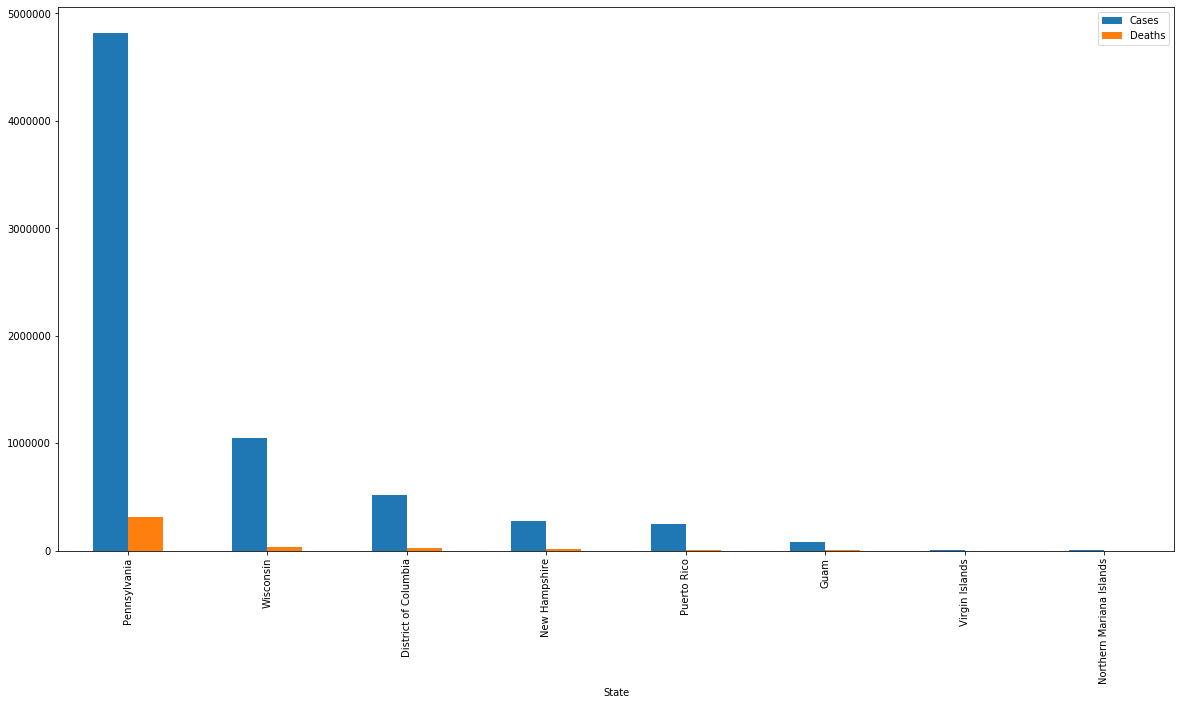

In [80]:
neutral_data.sort_values(by='Cases',ascending=False).plot.bar(x='State',figsize=(20,10))